<a href="https://colab.research.google.com/github/mar25-iia2-radiographies/mar25_radiographies_pulmonaires_covid19/blob/main/notebooks/01_data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exploration de la structure du dossier**

In [1]:
import kagglehub
from pathlib import Path
import os

# Download latest version of the dataset
path = kagglehub.dataset_download("tawsifurrahman/covid19-radiography-database")
print("Le dataset a été téléchargé ici :", path)

base_path = Path(path)
data_path = base_path / "COVID-19_Radiography_Dataset"

print("\n" + "="*80)
print("STRUCTURE COMPLÈTE - TOUS DOSSIERS/SOUS-DOSSIERS")
print("="*80)

# 1. RACINE
print("\n📁 RACINE:")
for item in sorted(base_path.iterdir()):
    print(f"  {item.name} ({item.stat().st_size/1024/1024:.1f}MB)")

# 2. EXPLORATION RÉCURSIVE COMPLÈTE
print("\n📂 ARBRE COMPLET (3 niveaux max):")
def print_tree(path, prefix="", max_depth=3, current_depth=0):
    if current_depth > max_depth:
        return

    items = sorted(path.iterdir())
    for i, item in enumerate(items):
        is_last = i == len(items) - 1
        connector = "└── " if is_last else "├── "
        print(f"{prefix}{connector}{item.name}")

        if item.is_dir():
            new_prefix = prefix + ("    " if is_last else "│   ")
            print_tree(item, new_prefix, max_depth, current_depth + 1)

print_tree(base_path, max_depth=2)

# 3. COMPTE IMAGES PAR DOSSIER
print("\n📊 COMPTE IMAGES PAR DOSSIER:")
def count_images_recursively(root):
    for root_dir, dirs, files in os.walk(root):
        png_count = len([f for f in files if f.lower().endswith('.png')])
        jpg_count = len([f for f in files if f.lower().endswith('.jpg')])

        if png_count + jpg_count > 0:
            rel_path = os.path.relpath(root_dir, base_path)
            print(f"  {rel_path:<40} : {png_count:>4} PNG + {jpg_count:>4} JPG = {png_count+jpg_count:>5} total")

count_images_recursively(base_path)

# 4. RÉSUMÉ FINAL
print("\n" + "="*80)
print("RÉSUMÉ FINAL")
print("="*80)
categories = ['COVID', 'Lung_Opacity', 'Normal', 'Viral Pneumonia']
total_images = 0

for cat in categories:
    cat_path = data_path / cat
    if cat_path.exists():
        all_images = list(cat_path.rglob('*.png')) + list(cat_path.rglob('*.jpg'))
        count = len(all_images)
        total_images += count
        print(f"✅ {cat}: {count:,} images")
        if count > 0:
            print(f"   Premier: {all_images[0].name}")
    else:
        print(f"❌ {cat}: DOSSIER MANQUANT")

print(f"\n🎯 TOTAL IMAGES: {total_images:,}")



Using Colab cache for faster access to the 'covid19-radiography-database' dataset.
Le dataset a été téléchargé ici : /kaggle/input/covid19-radiography-database

STRUCTURE COMPLÈTE - TOUS DOSSIERS/SOUS-DOSSIERS

📁 RACINE:
  COVID-19_Radiography_Dataset (0.0MB)

📂 ARBRE COMPLET (3 niveaux max):
└── COVID-19_Radiography_Dataset
    ├── COVID
    │   ├── images
    │   └── masks
    ├── COVID.metadata.xlsx
    ├── Lung_Opacity
    │   ├── images
    │   └── masks
    ├── Lung_Opacity.metadata.xlsx
    ├── Normal
    │   ├── images
    │   └── masks
    ├── Normal.metadata.xlsx
    ├── README.md.txt
    ├── Viral Pneumonia
    │   ├── images
    │   └── masks
    └── Viral Pneumonia.metadata.xlsx

📊 COMPTE IMAGES PAR DOSSIER:
  COVID-19_Radiography_Dataset/Normal/images : 10192 PNG +    0 JPG = 10192 total
  COVID-19_Radiography_Dataset/Normal/masks : 10192 PNG +    0 JPG = 10192 total
  COVID-19_Radiography_Dataset/Lung_Opacity/images : 6012 PNG +    0 JPG =  6012 total
  COVID-19_Radiogra

# **Visualisation**


RÉPARTITION PAR TYPE DE FICHIER (EXTENSION) :
  .png       : 42330 fichiers (100.0 %)
  .xlsx      :     4 fichiers (  0.0 %)
  .txt       :     1 fichiers (  0.0 %)


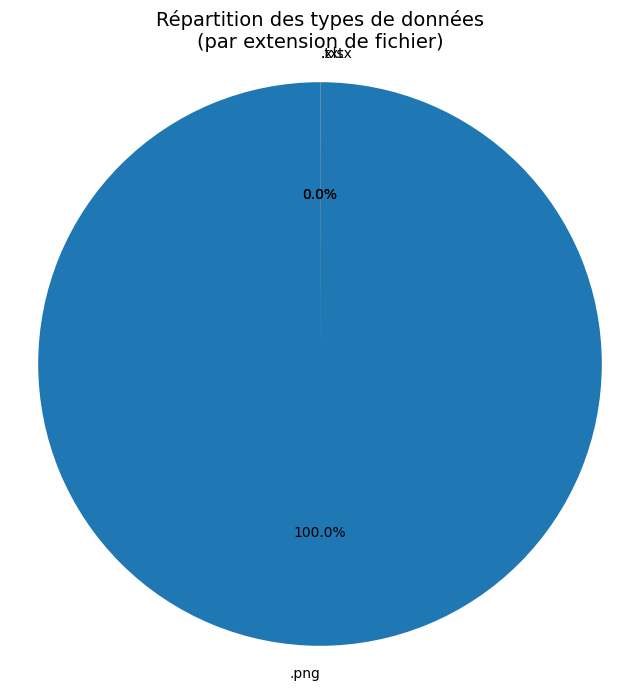

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

# Comptage des fichiers par extension dans COVID-19_Radiography_Dataset
ext_counter = Counter()

for root_dir, dirs, files in os.walk(data_path):
    for f in files:
        # extension en minuscule (ex: '.png', '.xlsx', '.txt', '')
        ext = os.path.splitext(f)[1].lower()
        if ext == '':
            ext = '(sans extension)'
        ext_counter[ext] += 1

# Affichage texte
print("\nRÉPARTITION PAR TYPE DE FICHIER (EXTENSION) :")
total_files = sum(ext_counter.values())
for ext, count in ext_counter.most_common():
    pct = count / total_files * 100
    print(f"  {ext:10s} : {count:5d} fichiers ({pct:5.1f} %)")

# Préparation données camembert
labels = []
sizes = []
for ext, count in ext_counter.most_common():
    labels.append(ext if ext != '' else '(sans)')
    sizes.append(count)

plt.figure(figsize=(8, 8))
plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',
    startangle=90
)
plt.title("Répartition des types de données\n(par extension de fichier)", fontsize=14)
plt.axis('equal')
plt.show()



RÉPARTITION DES TYPES DE FICHIERS :
  images  : 21165
  masks   : 21165
  metadata: 4
  autres  : 1

TOTAL PNG (images + masks) : 42330
  - images : 21165
  - masks  : 21165
TOTAL FICHIERS (tous types) : 42335


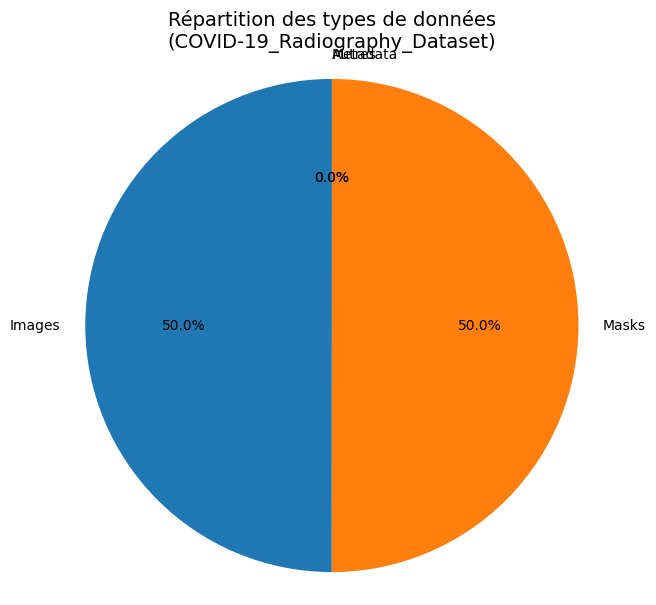

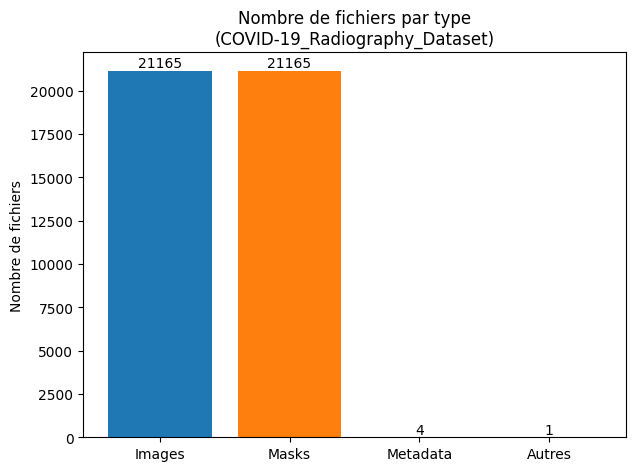

In [3]:
import matplotlib.pyplot as plt

# Comptage des fichiers par type dans COVID-19_Radiography_Dataset
types_counts = {
    'images': 0,
    'masks': 0,
    'metadata': 0,
    'autres': 0
}

for root_dir, dirs, files in os.walk(data_path):
    for f in files:
        f_lower = f.lower()
        if f_lower.endswith('.png'):
            if 'images' in root_dir.lower():
                types_counts['images'] += 1
            elif 'masks' in root_dir.lower():
                types_counts['masks'] += 1
            else:
                types_counts['autres'] += 1
        elif f_lower.endswith('.xlsx'):
            types_counts['metadata'] += 1
        else:
            types_counts['autres'] += 1

# Affichage clair des nombres
total_png = types_counts['images'] + types_counts['masks']
total_all = sum(types_counts.values())

print("\nRÉPARTITION DES TYPES DE FICHIERS :")
for k, v in types_counts.items():
    print(f"  {k:8s}: {v}")

print(f"\nTOTAL PNG (images + masks) : {total_png}")
print(f"  - images : {types_counts['images']}")
print(f"  - masks  : {types_counts['masks']}")
print(f"TOTAL FICHIERS (tous types) : {total_all}")

# Camembert
labels = ['Images', 'Masks', 'Metadata', 'Autres']
sizes  = [types_counts['images'],
          types_counts['masks'],
          types_counts['metadata'],
          types_counts['autres']]
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f']

plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%',
        startangle=90, colors=colors)
plt.title("Répartition des types de données\n(COVID-19_Radiography_Dataset)", fontsize=14)
plt.axis('equal')
plt.show()

# --- 2ᵉ VISU : graph sur les NOMBRES ---

# Données brutes
labels = ['Images', 'Masks', 'Metadata', 'Autres']
counts = [types_counts['images'],
          types_counts['masks'],
          types_counts['metadata'],
          types_counts['autres']]

plt.figure(figsize=(7, 5))
bars = plt.bar(labels, counts, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#7f7f7f'])

# Ajout des valeurs au-dessus des barres
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2,
             height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.title("Nombre de fichiers par type\n(COVID-19_Radiography_Dataset)")
plt.ylabel("Nombre de fichiers")
plt.show()



Total d'images trouvées : 21165


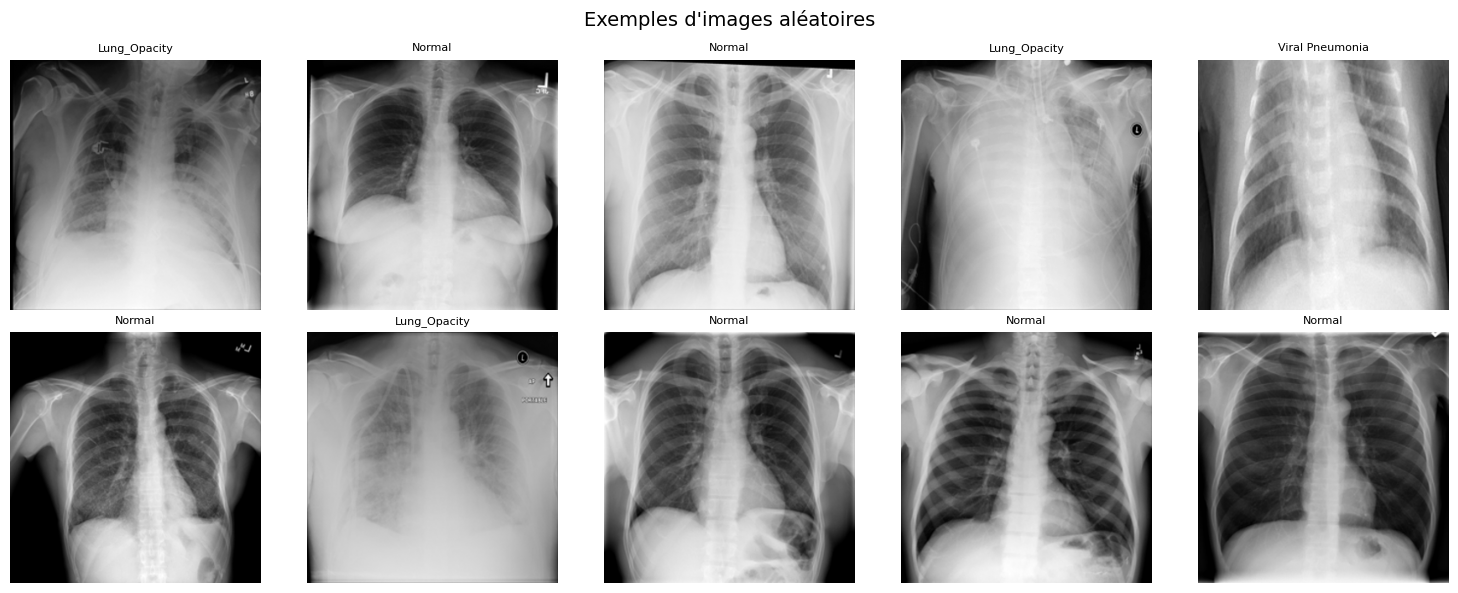

In [17]:
import random
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# Récupérer tous les chemins d'images (sous-dossier 'images')
all_img_paths = []
for cat in categories:
    cat_dir = data_path / cat / "images"
    all_img_paths += list(cat_dir.glob("*.png"))

print(f"\nTotal d'images trouvées : {len(all_img_paths)}")

# Gestion du cas où il y a moins de 10 images
nb_samples = min(10, len(all_img_paths))
if nb_samples == 0:
    print("⚠️ Aucune image trouvée dans les dossiers 'images'.")
else:
    sample_paths = random.sample(all_img_paths, nb_samples)

    # Affichage
    cols = 5
    rows = int(np.ceil(nb_samples / cols))

    plt.figure(figsize=(3 * cols, 3 * rows))
    for i, img_path in enumerate(sample_paths):
        try:
            img = Image.open(img_path).convert("L")
        except Exception as e:
            print(f"Erreur sur {img_path}: {e}")
            continue

        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img, cmap='gray')
        cat = img_path.parent.parent.name  # remonte à la catégorie
        ax.set_title(cat, fontsize=8)
        ax.axis("off")

    plt.suptitle("Exemples d'images aléatoires", fontsize=14)
    plt.tight_layout()
    plt.show()




# **Création du dataset**

In [18]:
from pathlib import Path
import pandas as pd
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import seaborn as sns

data_path = base_path / "COVID-19_Radiography_Dataset"

categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# Dataset de travail : SEULEMENT images/
image_paths = {}
for cat in categories:
    cat_dir = data_path / cat / 'images'
    image_paths[cat] = list(cat_dir.rglob('*.png'))
    print(f"✅ {cat}: {len(image_paths[cat]):,} images")

print(f"\n🎯 TOTAL: {sum(len(v) for v in image_paths.values()):,} images")



✅ COVID: 3,616 images
✅ Normal: 10,192 images
✅ Lung_Opacity: 6,012 images
✅ Viral Pneumonia: 1,345 images

🎯 TOTAL: 21,165 images


# **Images grayscale**

=== VÉRIFICATION GRAYSCALE (TOUTES LES IMAGES) ===

COVID: 3616 images analysées
  COVID-1994.png: L
  COVID-1825.png: L
  COVID-517.png: L

Normal: 10192 images analysées
  Normal-859.png: L
  Normal-158.png: L
  Normal-10121.png: L

Lung_Opacity: 6012 images analysées
  Lung_Opacity-35.png: L
  Lung_Opacity-1075.png: L
  Lung_Opacity-4459.png: L

Viral Pneumonia: 1345 images analysées
  Viral Pneumonia-1310.png: L
  Viral Pneumonia-1144.png: L
  Viral Pneumonia-1022.png: L

=== RÉSULTAT GRAYSCALE PAR CATÉGORIE ===
          category  total_checked  grayscale  color  pct_grayscale
0            COVID           3616       3616      0          100.0
1           Normal          10192      10192      0          100.0
2     Lung_Opacity           6012       6012      0          100.0
3  Viral Pneumonia           1345       1205    140           89.6

🎯 TOTAL ANALYSÉ: 21165 images
   Grayscale: 21025 (99.3%)
   Couleur:   140 (0.7%)


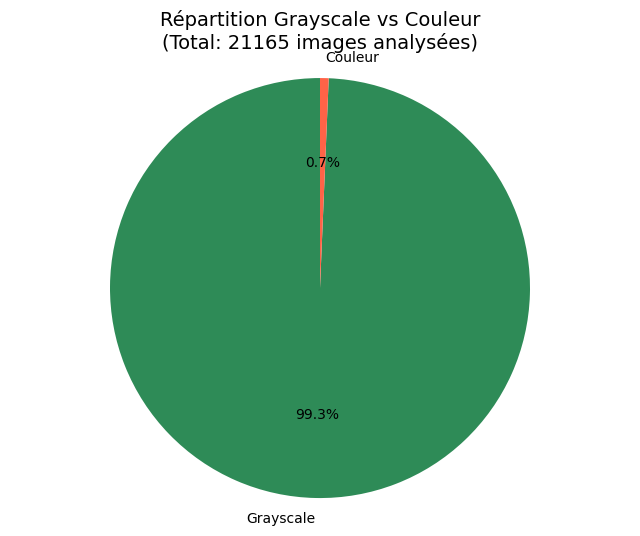

In [20]:
from pathlib import Path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt

# On réutilise base_path défini plus haut
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("=== VÉRIFICATION GRAYSCALE (TOUTES LES IMAGES) ===")

grayscale_stats = []
total_grayscale, total_color = 0, 0

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))  # ← plus de [:100]

    print(f"\n{cat}: {len(images)} images analysées")
    g_count, c_count = 0, 0

    for idx, img_path in enumerate(images):
        try:
            with Image.open(img_path) as img:
                if img.mode == 'L':
                    g_count += 1
                    total_grayscale += 1
                else:
                    c_count += 1
                    total_color += 1

                # On affiche quelques exemples au tout début
                if idx < 3:
                    print(f"  {img_path.name}: {img.mode}")
        except:
            pass

    total_cat = g_count + c_count
    grayscale_stats.append({
        'category': cat,
        'total_checked': total_cat,
        'grayscale': g_count,
        'color': c_count,
        'pct_grayscale': g_count / total_cat * 100 if total_cat > 0 else 0
    })

grayscale_df = pd.DataFrame(grayscale_stats)
print("\n=== RÉSULTAT GRAYSCALE PAR CATÉGORIE ===")
print(grayscale_df.round(1))

# CAMEMBERT TOTAL
total_images = total_grayscale + total_color
print(f"\n🎯 TOTAL ANALYSÉ: {total_images} images")
if total_images > 0:
    print(f"   Grayscale: {total_grayscale} ({total_grayscale/total_images*100:.1f}%)")
    print(f"   Couleur:   {total_color} ({total_color/total_images*100:.1f}%)")

    plt.figure(figsize=(8, 6))
    plt.pie([total_grayscale, total_color],
            labels=['Grayscale', 'Couleur'],
            autopct='%1.1f%%',
            colors=['#2E8B57', '#FF6347'],
            startangle=90)
    plt.title(f'Répartition Grayscale vs Couleur\n(Total: {total_images} images analysées)', fontsize=14)
    plt.axis('equal')
    plt.show()
else:
    print("⚠️ Aucune image analysée, pas de camembert affiché.")


## **Nombres d'images par catégorie**

NOMBRE TOTAL D'IMAGES PAR CATÉGORIE (dossier images/ complet)
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

RÉSUMÉ NOMBRE D'IMAGES :
          category  total_images
0            COVID          3616
1           Normal         10192
2     Lung_Opacity          6012
3  Viral Pneumonia          1345


/tmp/ipython-input-13542813.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=count_df, x='category', y='total_images', palette='Blues')


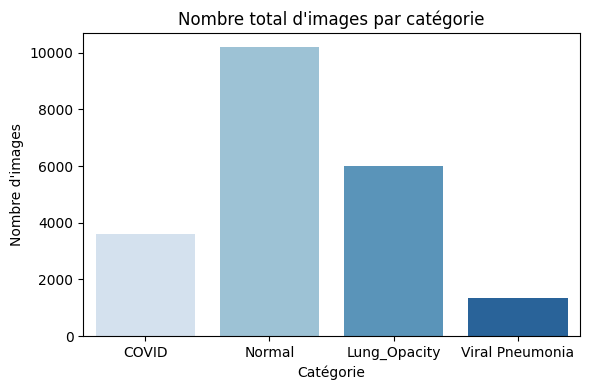

In [21]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("="*80)
print("NOMBRE TOTAL D'IMAGES PAR CATÉGORIE (dossier images/ complet)")
print("="*80)

count_stats = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))
    n = len(images)
    count_stats.append({'category': cat, 'total_images': n})
    print(f"{cat}: {n} images")

count_df = pd.DataFrame(count_stats)
print("\nRÉSUMÉ NOMBRE D'IMAGES :")
print(count_df)

# Graphe 1 : nombre total d'images par catégorie
plt.figure(figsize=(6, 4))
sns.barplot(data=count_df, x='category', y='total_images', palette='Blues')
plt.title("Nombre total d'images par catégorie")
plt.xlabel("Catégorie")
plt.ylabel("Nombre d'images")
plt.tight_layout()
plt.show()



# **Graphique à barres horizontales pour visualiser la distribution des sources de données.**

📋 Fichiers Excel trouvés :
  - Lung_Opacity.metadata.xlsx
    → chargé : Lung_Opacity.metadata_df (6012 lignes, 4 colonnes)
  - Normal.metadata.xlsx
    → chargé : Normal.metadata_df (10192 lignes, 4 colonnes)
  - COVID.metadata.xlsx
    → chargé : COVID.metadata_df (3616 lignes, 4 colonnes)
  - Viral Pneumonia.metadata.xlsx
    → chargé : Viral Pneumonia.metadata_df (1345 lignes, 4 colonnes)


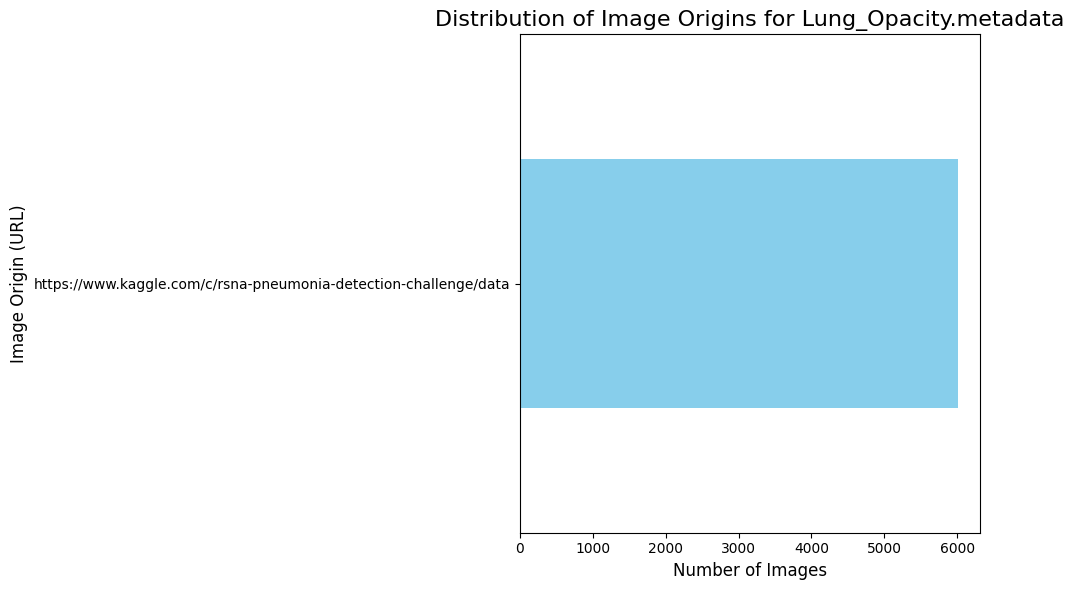

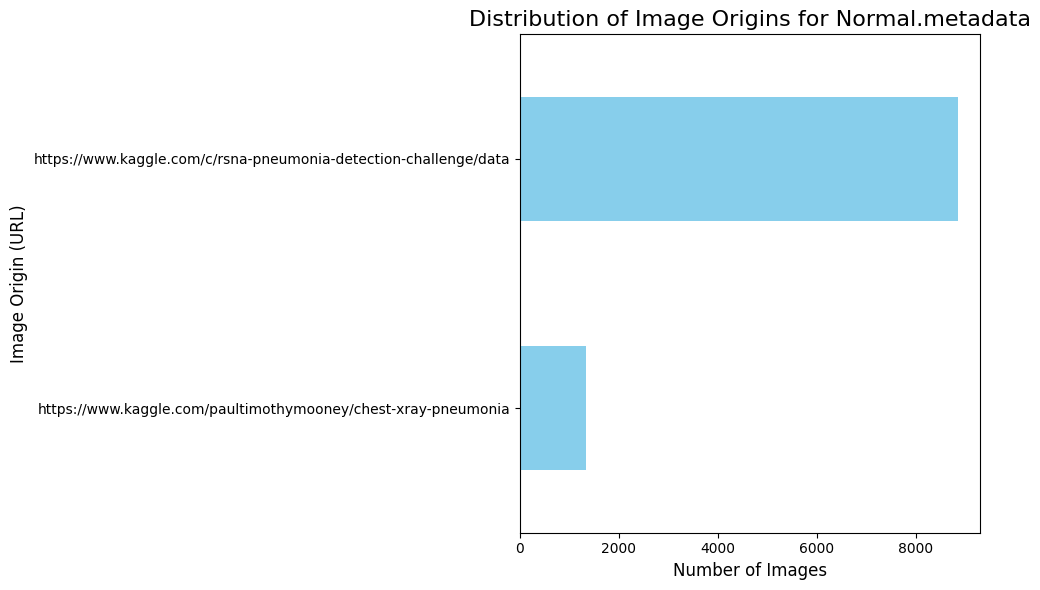

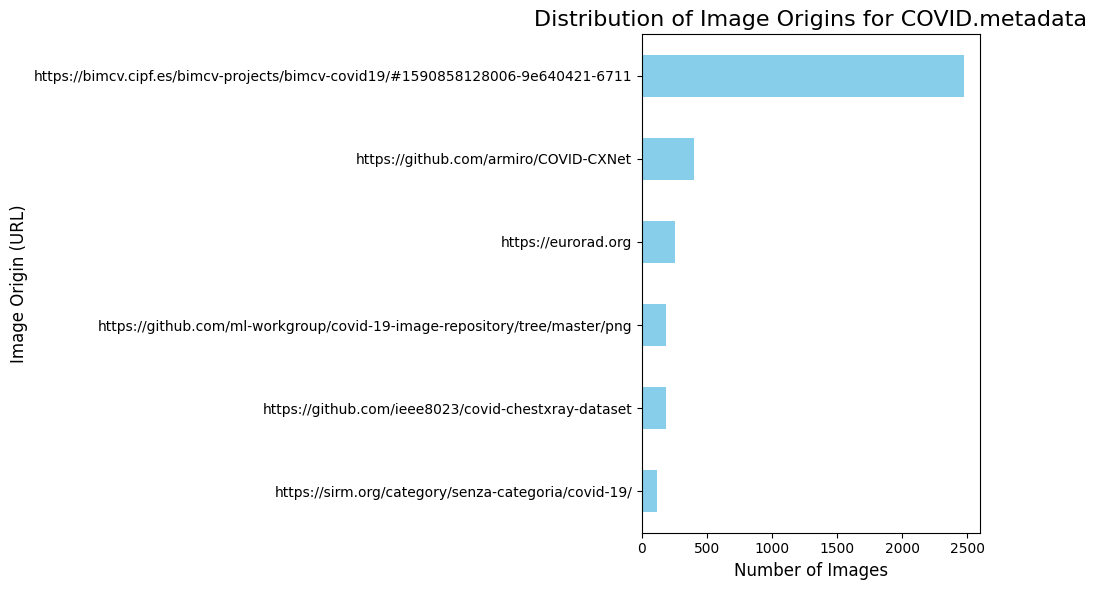

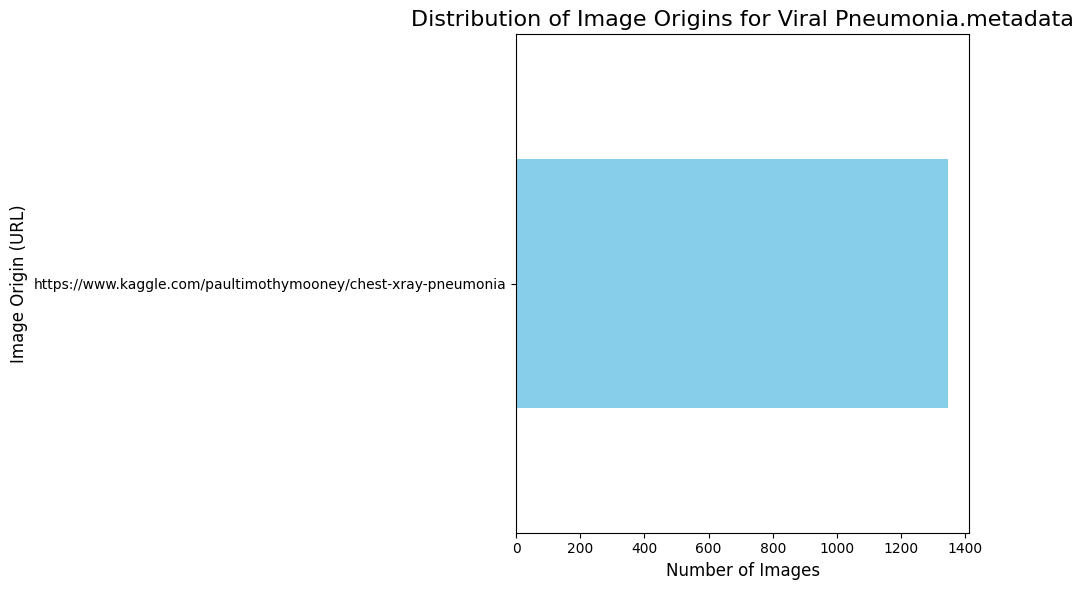

In [28]:
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

# 1) Recharger les métadonnées Excel → metadata_dfs
base_path = base_path  # on réutilise celui défini plus haut via kagglehub
excel_files = list(base_path.rglob('*.xlsx'))

metadata_dfs = {}
print("📋 Fichiers Excel trouvés :")
for excel_file in excel_files:
    print("  -", excel_file.name)
    try:
        df = pd.read_excel(excel_file)
        # Nom de clé lisible, ex: 'COVID_df', 'Normal_df', etc.
        key = excel_file.stem + '_df'
        metadata_dfs[key] = df
        print(f"    → chargé : {key} ({len(df)} lignes, {len(df.columns)} colonnes)")
    except Exception as e:
        print(f"    ❌ Erreur lecture {excel_file.name}: {e}")

# 2) Fonction pour tracer la distribution des sources (URL)
def plot_url_distribution(metadata_dfs, top_n=None, min_count=None):
    """
    top_n : garder uniquement les top_n sources les plus fréquentes (le reste agrégé en 'Other')
    min_count : ignorer les sources avec moins de min_count images
    """
    for df_name, df in metadata_dfs.items():
        if 'URL' not in df.columns:
            print(f"⚠️ Pas de colonne 'URL' dans {df_name}, on saute.")
            continue

        group_name = df_name.replace('_df', '')

        # Compter les occurrences par URL
        url_counts = df['URL'].value_counts()

        if url_counts.empty:
            print(f"⚠️ Colonne 'URL' vide pour {df_name}, pas de graphique.")
            continue

        # Filtrer les sources très rares
        if min_count is not None:
            url_counts = url_counts[url_counts >= min_count]

        # Limiter aux top_n et agréger le reste
        if top_n is not None and len(url_counts) > top_n:
            top = url_counts.iloc[:top_n]
            others_sum = url_counts.iloc[top_n:].sum()
            url_counts = top.copy()
            url_counts['Other sources'] = others_sum

        # Graphique horizontal
        plt.figure(figsize=(10, 6))
        url_counts.sort_values().plot(kind='barh', color='skyblue')

        plt.title(f"Distribution of Image Origins for {group_name}", fontsize=16)
        plt.xlabel("Number of Images", fontsize=12)
        plt.ylabel("Image Origin (URL)", fontsize=12)
        plt.tight_layout()
        plt.show()

# 3) Appel : top 8 sources pour chaque fichier de métadonnées
plot_url_distribution(metadata_dfs, top_n=8)



## Résumé de la distribution de l'origine des images par groupe
**Constatations :**
Groupe COVID : Le jeu de données COVID provient principalement d’une URL spécifique « BIMCV », qui représente la grande majorité des images (environ 2400+). D’autres sources comme ARMIRO, EURORAD, ML-WORKGROUP, IEEE et SIRM contribuent un nombre d’images nettement plus faible, chacune avec moins de 500 images.

**Groupe Lung_Opacity :** Le jeu de données Lung_Opacity provient exclusivement de RSNA, ce qui indique une seule origine dominante pour l’ensemble des images de cette catégorie (environ 6000+ images).

**Groupe Normal :** Comme pour le groupe Lung_Opacity, le jeu de données Normal est également fortement dominé par une seule source, RSNA, qui fournit plus de 8500 images. PNEUMONIA est l’unique autre source répertoriée, avec un nombre d’images plus faible mais notable (environ 1400+).

**Groupe Viral Pneumonia :** Ce groupe présente une seule origine d’images, PNEUMONIA, qui représente la totalité des images de cette catégorie (environ 1300+ images).

**Synthèse globale :**
Hétérogénéité des sources de données : Bien que le jeu de données global soit constitué d’images provenant de multiples sources, la distribution au sein des groupes diagnostiques spécifiques (COVID, Lung_Opacity, Normal, Viral Pneumonia) révèle des degrés variables d’hétérogénéité des sources. Certains groupes dépendent presque entièrement d’une seule source (Lung_Opacity, Viral Pneumonia), tandis que d’autres sont dominés par une source principale avec de faibles contributions d’autres (COVID, Normal).

**Sources dominantes :** RSNA est un contributeur majeur pour les images Lung_Opacity et Normal, tandis qu’une URL spécifique (liée à BIMCV-COVID19) est la source principale pour les images COVID, et PNEUMONIA est la seule source pour Viral Pneumonia.

**Biais potentiels :** La forte dépendance à une seule source, ou à très peu de sources, dans certains groupes peut introduire des biais liés aux protocoles d’imagerie, aux caractéristiques démographiques des patients ou aux présentations cliniques spécifiques à ces sources. C’est un point important à prendre en compte pour toute analyse ultérieure ou tout entraînement de modèle utilisant ces données.

# **Tailles des images par catégorie**


ANALYSE DES TAILLES D'IMAGES PAR CATÉGORIE (TOUTES LES IMAGES)

COVID: 3616 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    3616
Name: count, dtype: int64

Normal: 10192 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    10192
Name: count, dtype: int64

Lung_Opacity: 6012 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    6012
Name: count, dtype: int64

Viral Pneumonia: 1345 images analysées
Tailles les plus fréquentes (width, height -> count) :
(299, 299)    1345
Name: count, dtype: int64

RÉSUMÉ GLOBAL DES TAILLES :
          category  total_checked  unique_sizes most_common_size  \
0            COVID           3616             1       (299, 299)   
1           Normal          10192             1       (299, 299)   
2     Lung_Opacity           6012             1       (299, 299)   
3  Viral Pneumonia           1345             1       (299, 299)   

   most_common_count  
0  

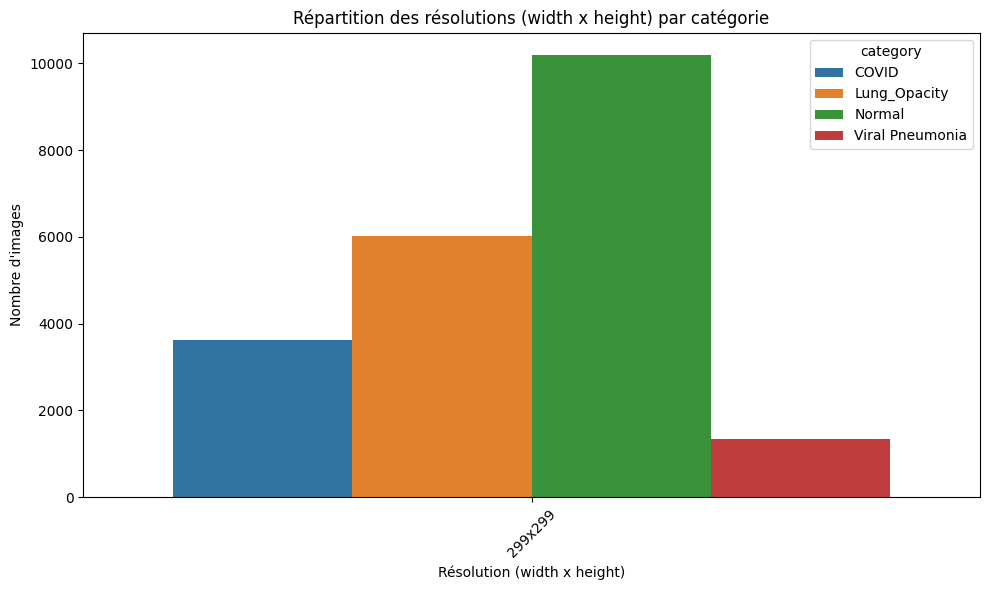

In [30]:
from pathlib import Path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On réutilise base_path défini plus haut via kagglehub
# base_path = Path("/kaggle/input/covid19-radiography-database")  # ← à ne plus utiliser
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\n" + "="*80)
print("ANALYSE DES TAILLES D'IMAGES PAR CATÉGORIE (TOUTES LES IMAGES)")
print("="*80)

size_stats = []    # résumé global par catégorie
all_sizes = []     # toutes les images, pour graphes

for cat in categories:
    cat_path = data_path / cat / 'images'
    images = list(cat_path.glob('*.png'))   # TOUTES les images

    sizes = []
    for img_path in images:
        try:
            with Image.open(img_path) as img:
                w, h = img.size
                sizes.append((w, h))
                all_sizes.append({
                    'category': cat,
                    'width': w,
                    'height': h,
                    'size_str': f"{w}x{h}"
                })
        except Exception as e:
            print(f"⚠️ Erreur lecture {img_path}: {e}")
            continue

    if len(sizes) == 0:
        print(f"\n{cat}: aucune image lue.")
        continue

    size_series = pd.Series(sizes)
    size_counts = size_series.value_counts().sort_index()

    print(f"\n{cat}: {len(sizes)} images analysées")
    print("Tailles les plus fréquentes (width, height -> count) :")
    print(size_counts.head(10))

    size_stats.append({
        'category': cat,
        'total_checked': len(sizes),
        'unique_sizes': len(size_counts),
        'most_common_size': size_counts.index[0],
        'most_common_count': size_counts.iloc[0]
    })

# Résumé global
size_df = pd.DataFrame(size_stats)
print("\nRÉSUMÉ GLOBAL DES TAILLES :")
print(size_df)

# ===================== GRAPHIQUES =====================

sizes_df = pd.DataFrame(all_sizes)

if not sizes_df.empty:
    # Graphe 1 : histogramme des résolutions (width x height) par catégorie
    size_counts_all = (
        sizes_df
        .groupby(['category', 'size_str'])
        .size()
        .reset_index(name='count')
    )

    plt.figure(figsize=(10, 6))
    sns.barplot(data=size_counts_all, x='size_str', y='count', hue='category')
    plt.title("Répartition des résolutions (width x height) par catégorie")
    plt.xlabel("Résolution (width x height)")
    plt.ylabel("Nombre d'images")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n⚠️ Aucune taille d'image collectée, pas de graphique généré.")





# **Niveaux de gris par categorie et global**


DENSITÉ LISSEE DES PIXELS PAR CATÉGORIE (toutes les images)
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images


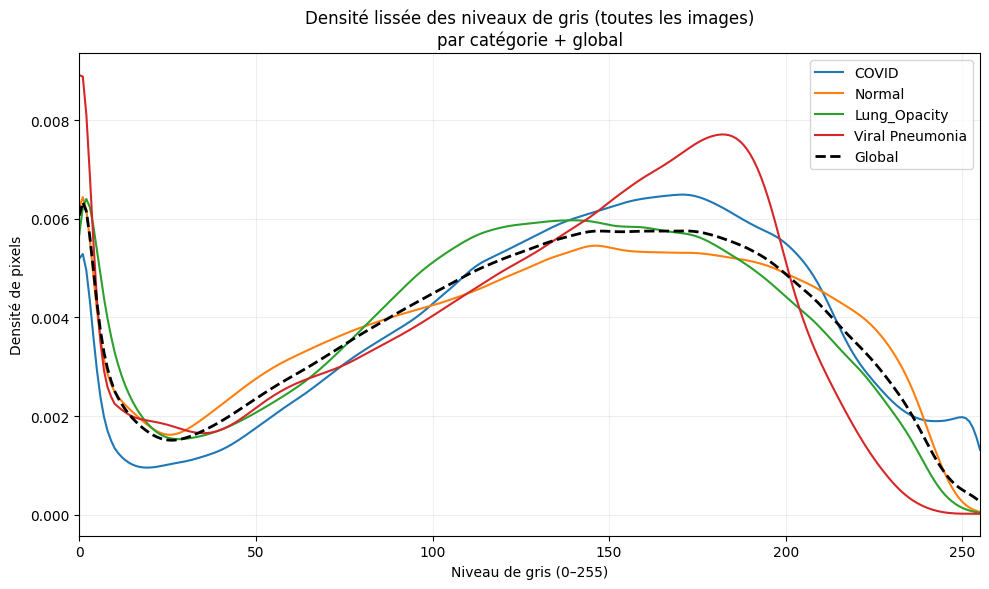

In [32]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt


data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

bins = np.arange(257)  # 0..256
x = np.arange(256)

print("\n" + "="*80)
print("DENSITÉ LISSEE DES PIXELS PAR CATÉGORIE (toutes les images)")
print("="*80)

hist_by_cat = {}
total_hist = np.zeros(256, dtype=np.float64)

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # TOUTES les images
    print(f"{cat}: {len(image_paths)} images")

    hist_cat = np.zeros(256, dtype=np.float64)
    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.uint8)
            h, _ = np.histogram(arr, bins=bins, range=(0, 256))
            hist_cat += h
            total_hist += h
        except Exception as e:
            # print(f"Erreur lecture {img_path}: {e}")
            continue

    if hist_cat.sum() == 0:
        continue
    hist_by_cat[cat] = hist_cat

# --- lissage gaussien simple ---
def gaussian_smooth(hist, sigma=3):
    radius = int(3 * sigma)
    t = np.arange(-radius, radius + 1)
    kernel = np.exp(-0.5 * (t / sigma) ** 2)
    kernel /= kernel.sum()
    return np.convolve(hist, kernel, mode='same')

plt.figure(figsize=(10, 6))

# courbes par catégorie
for cat, h in hist_by_cat.items():
    h_norm = h / h.sum()
    h_smooth = gaussian_smooth(h_norm, sigma=3)
    plt.plot(x, h_smooth, label=cat)

# courbe globale
if total_hist.sum() > 0:
    global_norm = total_hist / total_hist.sum()
    global_smooth = gaussian_smooth(global_norm, sigma=3)
    plt.plot(x, global_smooth, color='black', linestyle='--', linewidth=2, label='Global')

plt.xlim(0, 255)
plt.title("Densité lissée des niveaux de gris (toutes les images)\npar catégorie + global")
plt.xlabel("Niveau de gris (0–255)")
plt.ylabel("Densité de pixels")
plt.grid(alpha=0.2)
plt.legend()
plt.tight_layout()
plt.show()






Calcul de la luminosité moyenne / std / max par image...
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

Statistiques descriptives par catégorie :
                mean_luminosity                                                \
                          count    mean    std    min     25%     50%     75%   
category                                                                        
COVID                    3616.0  139.52  25.03  25.51  126.88  142.59  155.97   
Lung_Opacity             6012.0  126.02  23.57  32.23  110.58  120.82  142.10   
Normal                  10192.0  129.39  22.45  26.44  113.52  125.51  143.64   
Viral Pneumonia          1345.0  125.37  18.98  64.77  113.50  126.86  137.79   

                        std_luminosity         ...                 \
                    max          count   mean  ...    75%     max   
category                                       ...                  
COVID            216.56      

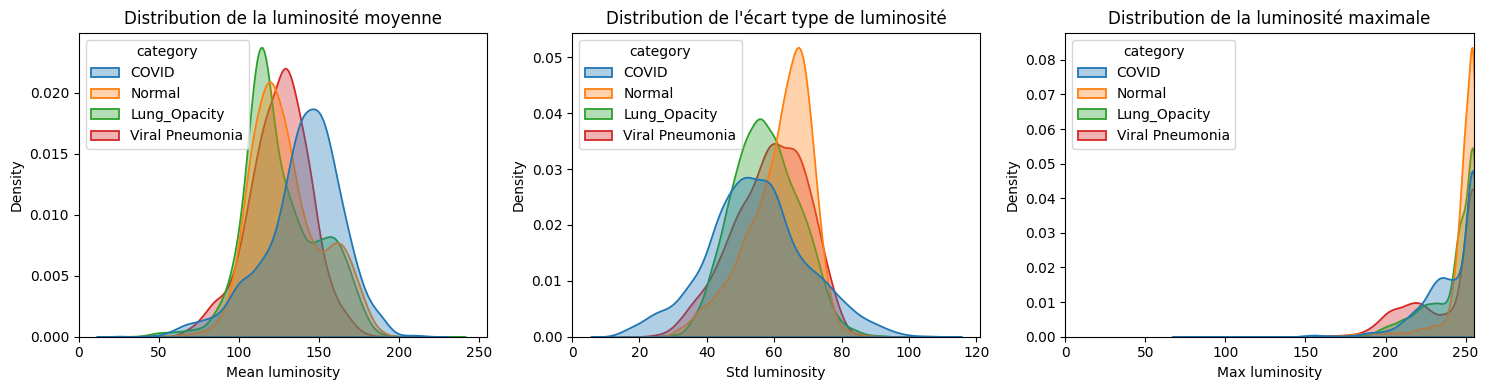

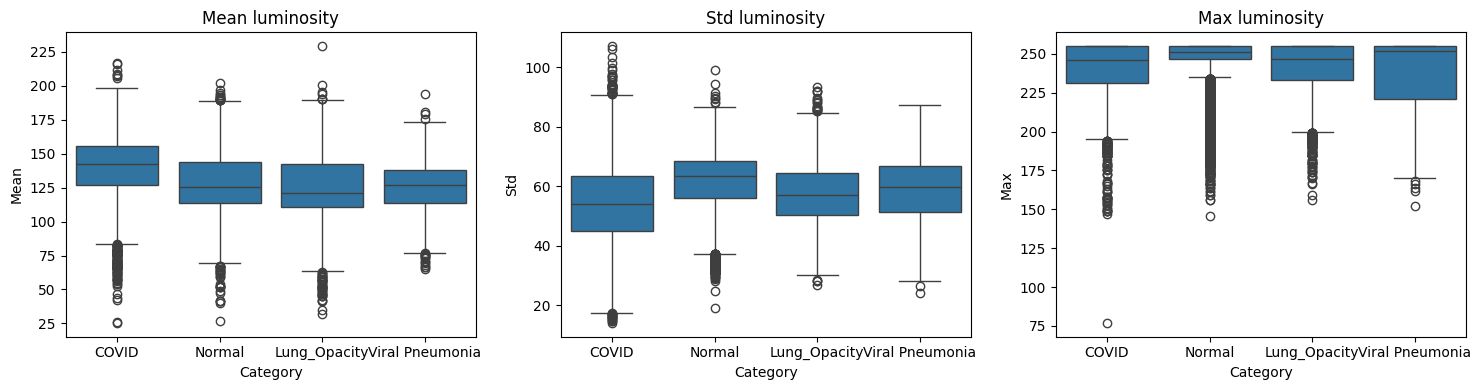

In [34]:
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# On réutilise base_path défini plus haut
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\nCalcul de la luminosité moyenne / std / max par image...")

rows = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # toutes les images
    print(f"{cat}: {len(image_paths)} images")

    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.float32)
            rows.append({
                'category': cat,
                'filename': img_path.name,
                'mean_luminosity': arr.mean(),
                'std_luminosity': arr.std(),
                'max_luminosity': arr.max()
            })
        except:
            continue

lum_df = pd.DataFrame(rows)

print("\nStatistiques descriptives par catégorie :")
print(
    lum_df.groupby('category')[['mean_luminosity',
                                'std_luminosity',
                                'max_luminosity']].describe().round(2)
)

# ================== GRAPHE KDE MEAN / STD / MAX ==================
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.kdeplot(
    data=lum_df,
    x='mean_luminosity',
    hue='category',
    fill=True,
    common_norm=False,
    alpha=0.35,
    linewidth=1.3
)
plt.title("Distribution de la luminosité moyenne")
plt.xlabel("Mean luminosity")
plt.ylabel("Density")
plt.xlim(0, 255)

plt.subplot(1, 3, 2)
sns.kdeplot(
    data=lum_df,
    x='std_luminosity',
    hue='category',
    fill=True,
    common_norm=False,
    alpha=0.35,
    linewidth=1.3
)
plt.title("Distribution de l'écart type de luminosité")
plt.xlabel("Std luminosity")
plt.ylabel("Density")

plt.subplot(1, 3, 3)
sns.kdeplot(
    data=lum_df,
    x='max_luminosity',
    hue='category',
    fill=True,
    common_norm=False,
    alpha=0.35,
    linewidth=1.3
)
plt.title("Distribution de la luminosité maximale")
plt.xlabel("Max luminosity")
plt.ylabel("Density")
plt.xlim(0, 255)

plt.tight_layout()
plt.show()

# ================== BOXPLOTS RÉSUMÉS ==================
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.boxplot(data=lum_df, x='category', y='mean_luminosity')
plt.title('Mean luminosity')
plt.xlabel('Category')
plt.ylabel('Mean')

plt.subplot(1, 3, 2)
sns.boxplot(data=lum_df, x='category', y='std_luminosity')
plt.title('Std luminosity')
plt.xlabel('Category')
plt.ylabel('Std')

plt.subplot(1, 3, 3)
sns.boxplot(data=lum_df, x='category', y='max_luminosity')
plt.title('Max luminosity')
plt.xlabel('Category')
plt.ylabel('Max')

plt.tight_layout()
plt.show()





Nombre total d'images sélectionnées : 8


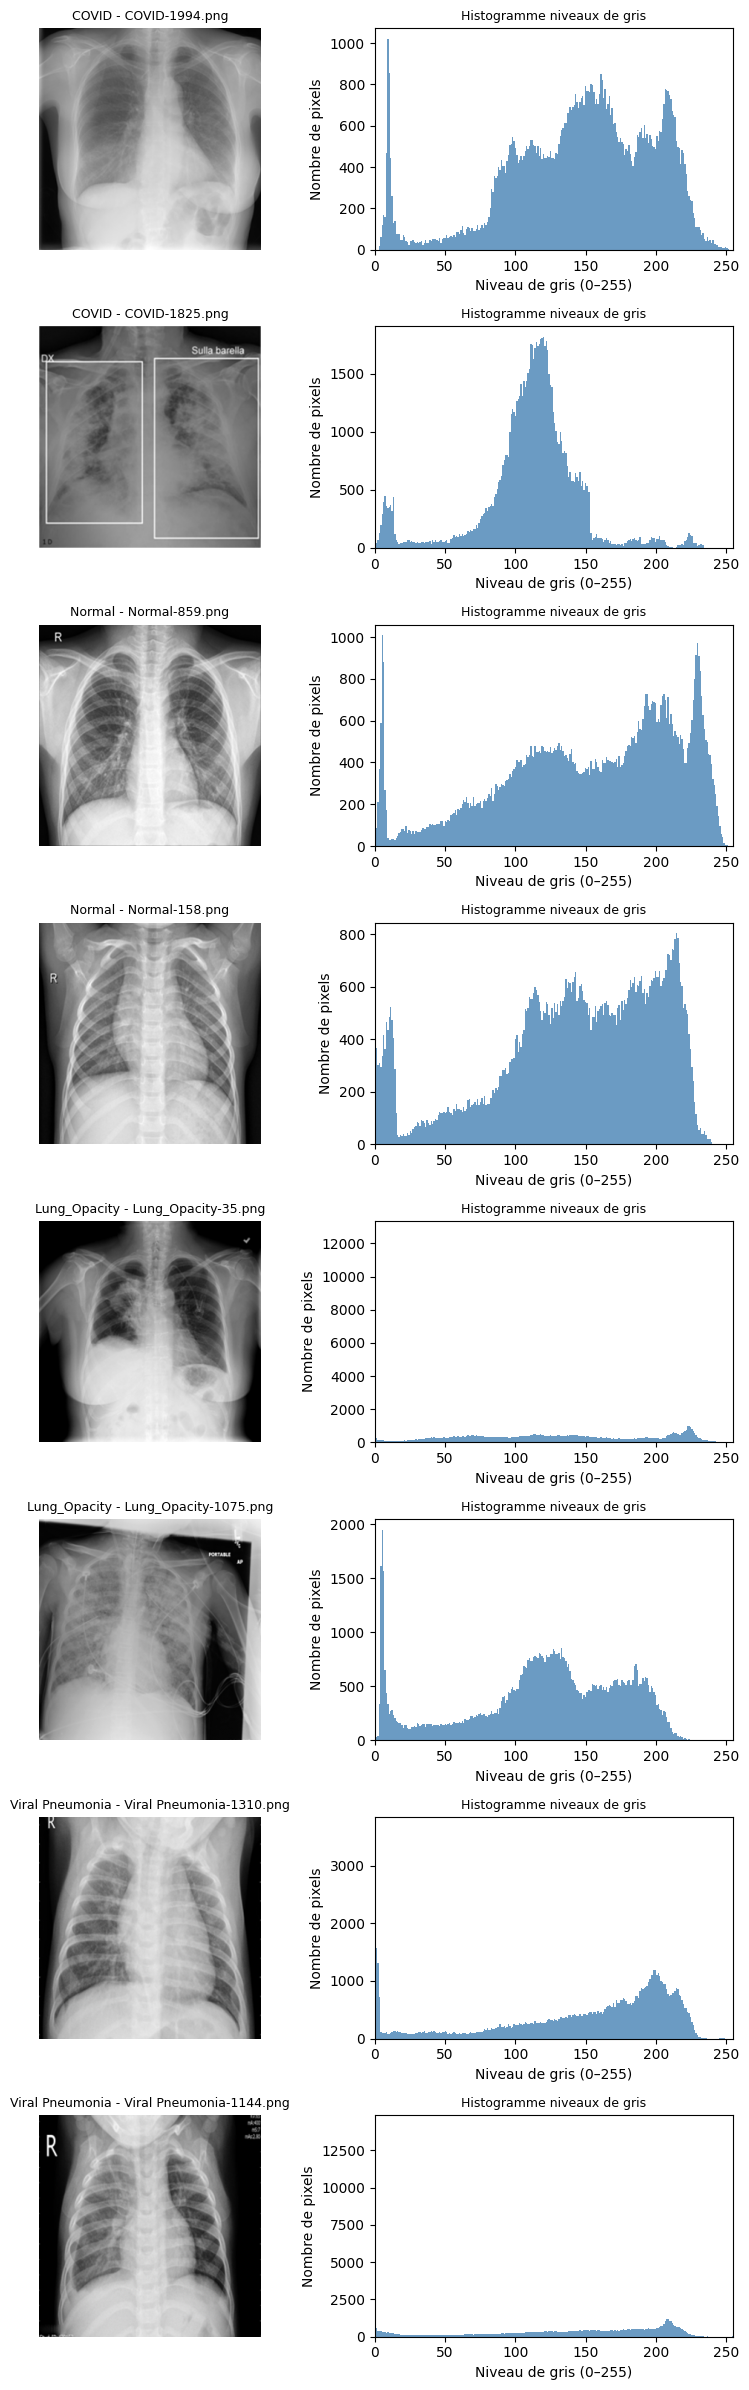

In [35]:
from pathlib import Path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# On réutilise base_path défini plus haut
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

# 2 images par catégorie → 8 images au total
samples_per_class = 2
selected = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))
    image_paths = image_paths[:samples_per_class]  # simple : prends les 2 premières
    for p in image_paths:
        selected.append((cat, p))

print(f"Nombre total d'images sélectionnées : {len(selected)}")

n = len(selected)
fig, axes = plt.subplots(nrows=n, ncols=2, figsize=(8, 3 * n))

if n == 1:
    axes = np.array([axes])  # homogénéiser

for i, (cat, img_path) in enumerate(selected):
    # Image
    img = Image.open(img_path).convert('L')
    arr = np.array(img, dtype=np.uint8)

    ax_img = axes[i, 0]
    ax_hist = axes[i, 1]

    ax_img.imshow(arr, cmap='gray')
    ax_img.set_title(f"{cat} - {img_path.name}", fontsize=9)
    ax_img.axis('off')

    # Histogramme
    ax_hist.hist(arr.ravel(), bins=256, range=(0, 255), color='steelblue', alpha=0.8)
    ax_hist.set_xlim(0, 255)
    ax_hist.set_title("Histogramme niveaux de gris", fontsize=9)
    ax_hist.set_xlabel("Niveau de gris (0–255)")
    ax_hist.set_ylabel("Nombre de pixels")

plt.tight_layout()
plt.show()


In [36]:
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd

# Chemins
base_path = Path("/kaggle/input/covid19-radiography-database")
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\nCalcul des features par image (mean, std, min, max)...")

rows = []

for cat in categories:
    cat_path = data_path / cat / 'images'
    image_paths = list(cat_path.glob('*.png'))  # une ligne = une image
    print(f"{cat}: {len(image_paths)} images")

    for img_path in image_paths:
        try:
            img = Image.open(img_path).convert('L')
            arr = np.array(img, dtype=np.float32)

            rows.append({
                'category': cat,
                'filename': img_path.name,
                'mean': arr.mean(),
                'std': arr.std(),
                'min': arr.min(),
                'max': arr.max()
            })
        except:
            continue

feat_df = pd.DataFrame(rows)

# Seuils pour outliers
low_thresh  = 75
high_thresh = 175

feat_df['is_outlier'] = (feat_df['mean'] < low_thresh) | (feat_df['mean'] > high_thresh)

print(f"\nImages avec mean < {low_thresh} : {(feat_df['mean'] < low_thresh).sum()}")
print(f"Images avec mean > {high_thresh}: {(feat_df['mean'] > high_thresh).sum()}")
print(f"Total outliers (mean < {low_thresh} ou > {high_thresh}) : {feat_df['is_outlier'].sum()}")

# Vérification que la colonne existe bien
print("\nColonnes de feat_df :", feat_df.columns.tolist())




Calcul des features par image (mean, std, min, max)...
COVID: 3616 images
Normal: 10192 images
Lung_Opacity: 6012 images
Viral Pneumonia: 1345 images

Images avec mean < 75 : 215
Images avec mean > 175: 587
Total outliers (mean < 75 ou > 175) : 802

Colonnes de feat_df : ['category', 'filename', 'mean', 'std', 'min', 'max', 'is_outlier']


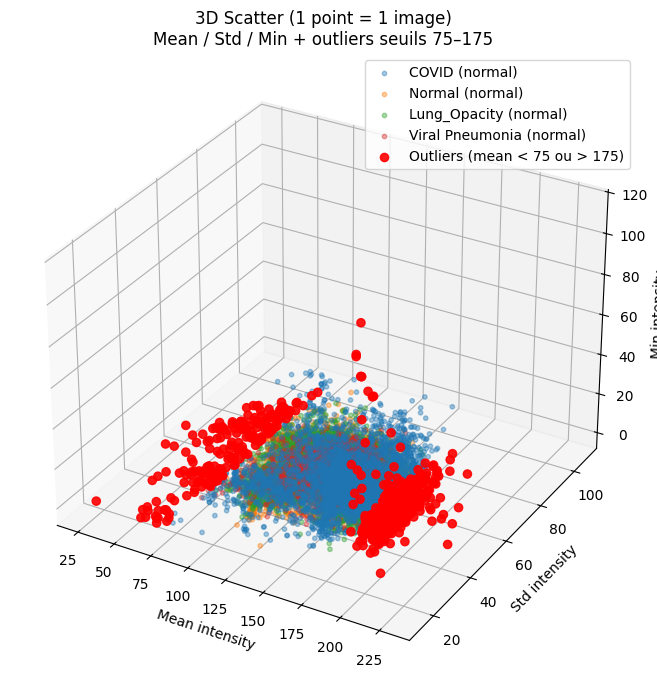

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # parfois nécessaire selon l'environnement
import seaborn as sns

# Couleurs par catégorie
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']
palette = sns.color_palette("tab10", n_colors=len(categories))
color_map = {cat: palette[i] for i, cat in enumerate(categories)}

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Points "normaux" (non outliers)
for cat in categories:
    df_cat = feat_df[(feat_df['category'] == cat) & (~feat_df['is_outlier'])]
    if df_cat.empty:
        continue
    ax.scatter(
        df_cat['mean'],
        df_cat['std'],
        df_cat['min'],
        c=[color_map[cat]],
        s=10,
        alpha=0.4,
        label=f"{cat} (normal)"
    )

# Points outliers (mean < 75 ou > 175)
df_out = feat_df[feat_df['is_outlier']]
if not df_out.empty:
    ax.scatter(
        df_out['mean'],
        df_out['std'],
        df_out['min'],
        c='red',
        s=35,
        alpha=0.9,
        label='Outliers (mean < 75 ou > 175)'
    )

ax.set_xlabel('Mean intensity')
ax.set_ylabel('Std intensity')
ax.set_zlabel('Min intensity')
ax.set_title('3D Scatter (1 point = 1 image)\nMean / Std / Min + outliers seuils 75–175')

ax.legend()
plt.tight_layout()
plt.show()





# **Exemple de outliers**

15 outliers avec mean < 75
15 outliers avec mean > 175


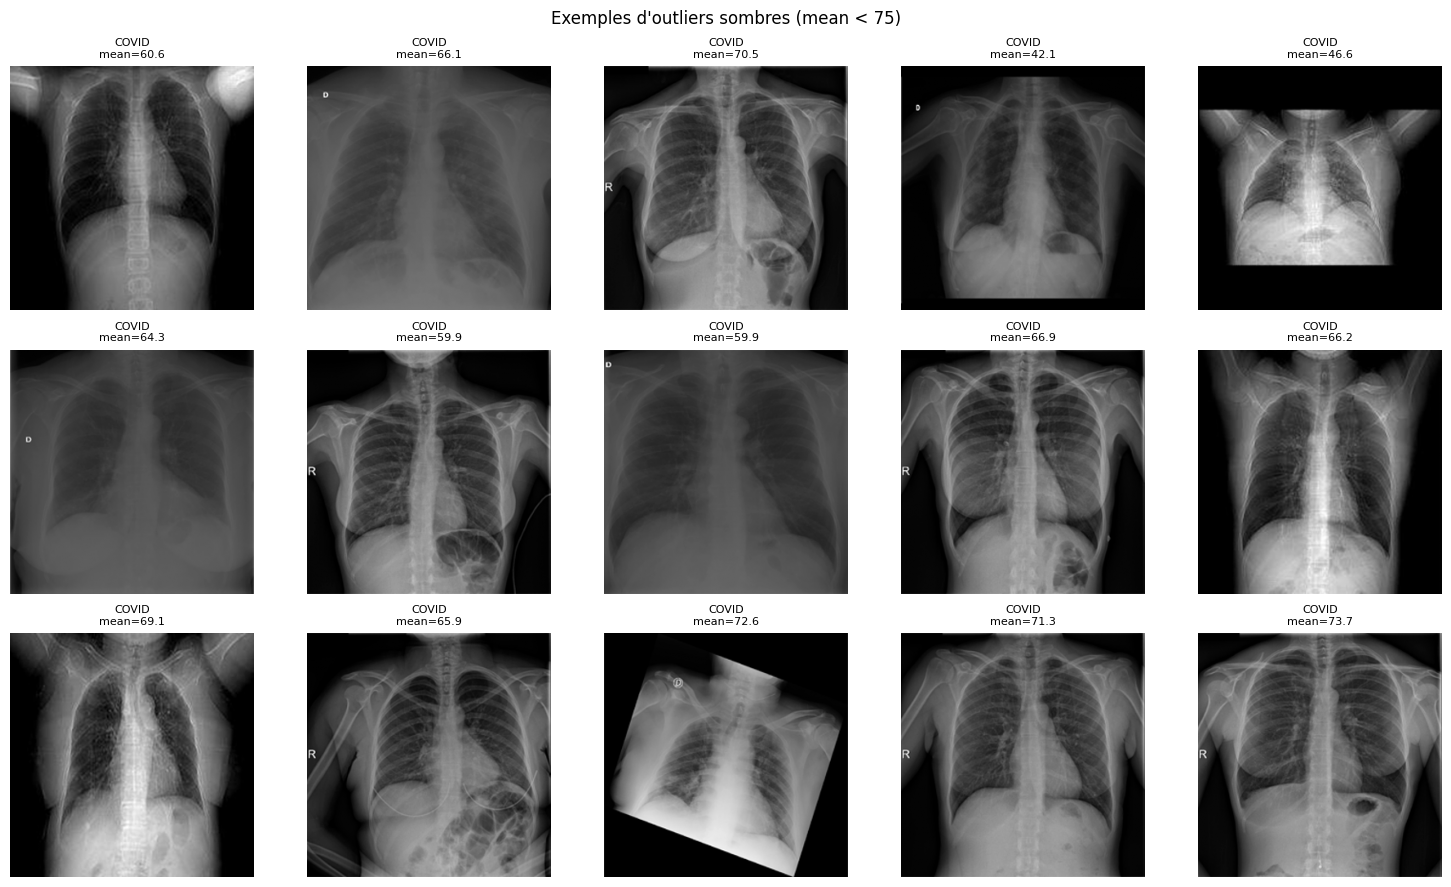

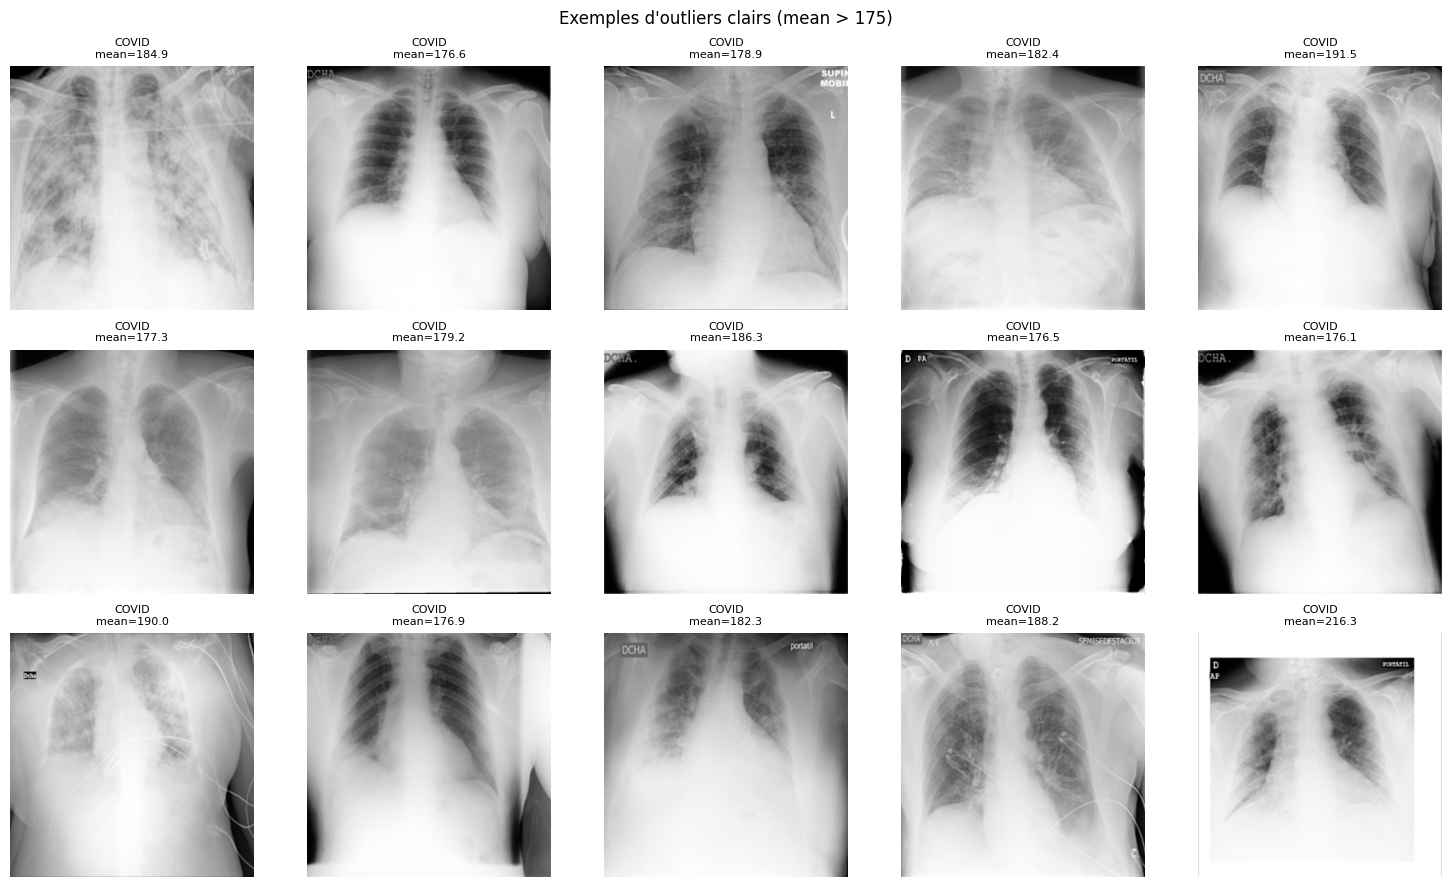

In [39]:
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np  # nécessaire pour ceil

# On réutilise base_path défini plus haut
data_path = base_path / "COVID-19_Radiography_Dataset"

# Seuils
low_thresh  = 75
high_thresh = 175

# Sélection de 15 outliers bas et 15 outliers hauts
low_outliers  = feat_df[feat_df['mean'] < low_thresh].head(15)
high_outliers = feat_df[feat_df['mean'] > high_thresh].head(15)

print(f"{len(low_outliers)} outliers avec mean < {low_thresh}")
print(f"{len(high_outliers)} outliers avec mean > {high_thresh}")

def show_outliers(df, title):
    n = len(df)
    if n == 0:
        print(f"Aucun outlier pour : {title}")
        return

    cols = 5
    rows = int(np.ceil(n / cols))

    plt.figure(figsize=(3 * cols, 3 * rows))
    for i, (_, row) in enumerate(df.iterrows()):
        cat = row['category']
        fname = row['filename']
        img_path = data_path / cat / "images" / fname

        try:
            img = Image.open(img_path).convert('L')
        except Exception as e:
            # print(f"Erreur lecture {img_path}: {e}")
            continue

        ax = plt.subplot(rows, cols, i + 1)
        ax.imshow(img, cmap='gray')
        ax.set_title(f"{cat}\nmean={row['mean']:.1f}", fontsize=8)
        ax.axis('off')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

# Affichage des 15 outliers les plus sombres
show_outliers(low_outliers, f"Exemples d'outliers sombres (mean < {low_thresh})")

# Affichage des 15 outliers les plus clairs
show_outliers(high_outliers, f"Exemples d'outliers clairs (mean > {high_thresh})")



# **Test statistique t de student, compare Covid vs Normal**

In [40]:
from pathlib import Path
from PIL import Image
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind

# On réutilise base_path défini plus haut
data_path = base_path / "COVID-19_Radiography_Dataset"
categories = ['COVID', 'Normal', 'Lung_Opacity', 'Viral Pneumonia']

print("\nConstruction de df_total (filepath + classe)...")

records = []
for cat in categories:
    cat_path = data_path / cat / 'images'
    for img_path in cat_path.glob('*.png'):
        records.append({
            'filepath': str(img_path),
            'classe': cat
        })

df_total = pd.DataFrame(records)
print(df_total.head())
print(df_total['classe'].value_counts())

print("\n" + "="*80)
print("TEST T DE STUDENT : Intensité moyenne des pixels COVID vs Normal")
print("="*80)

covid_pixels = []
normal_pixels = []

# on prend 50 images max par classe pour le test
for f in df_total[df_total["classe"] == "COVID"]["filepath"].head(50):
    img = Image.open(f).convert("L")
    covid_pixels.append(np.mean(np.array(img)))

for f in df_total[df_total["classe"] == "Normal"]["filepath"].head(50):
    img = Image.open(f).convert("L")
    normal_pixels.append(np.mean(np.array(img)))

covid_pixels = np.array(covid_pixels, dtype=np.float32)
normal_pixels = np.array(normal_pixels, dtype=np.float32)

print(f"COVID  - mean: {covid_pixels.mean():.2f}, std: {covid_pixels.std():.2f}, n={len(covid_pixels)}")
print(f"Normal - mean: {normal_pixels.mean():.2f}, std: {normal_pixels.std():.2f}, n={len(normal_pixels)}")

# Test t (Welch, plus robuste)
t_stat, p_val = ttest_ind(covid_pixels, normal_pixels, equal_var=False)
print(f"\nT-statistic: {t_stat:.2f}, p-value: {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print(f"Conclusion : p-value = {p_val:.4f} < {alpha} → on rejette H0.")
    print("→ Il existe une différence significative entre l’intensité moyenne des pixels des images COVID et Normal.")
    print("   Cette différence moyenne peut être exploitée par un modèle de classification,")
    print("   mais ne garantit pas que toutes les images soient facilement séparables :")
    print("   contraste local, résolution, artefacts et protocole d’acquisition peuvent aussi influencer le modèle.")
else:
    print(f"Conclusion : p-value = {p_val:.4f} ≥ {alpha} → on ne rejette pas H0.")
    print("→ Aucune différence significative détectée entre les intensités moyennes COVID et Normal.")



Construction de df_total (filepath + classe)...
                                            filepath classe
0  /kaggle/input/covid19-radiography-database/COV...  COVID
1  /kaggle/input/covid19-radiography-database/COV...  COVID
2  /kaggle/input/covid19-radiography-database/COV...  COVID
3  /kaggle/input/covid19-radiography-database/COV...  COVID
4  /kaggle/input/covid19-radiography-database/COV...  COVID
classe
Normal             10192
Lung_Opacity        6012
COVID               3616
Viral Pneumonia     1345
Name: count, dtype: int64

TEST T DE STUDENT : Intensité moyenne des pixels COVID vs Normal
COVID  - mean: 141.48, std: 20.70, n=50
Normal - mean: 129.52, std: 27.27, n=50

T-statistic: 2.45, p-value: 0.0163
Conclusion : p-value = 0.0163 < 0.05 → on rejette H0.
→ Il existe une différence significative entre l’intensité moyenne des pixels des images COVID et Normal.
   Cette différence moyenne peut être exploitée par un modèle de classification,
   mais ne garantit pas que toutes 

**Résultats du test t de Student :** p-value = 0.0163 < 0.05 → On rejette H₀. Les images **COVID** ont une intensité moyenne significativement différente des images **Normal** (141.48 vs 129.52, Δ = +11.96 unités de gris). Cette différence peut être exploitée par un modèle de classification, mais ne garantit pas que toutes les images soient facilement séparables : contraste local, résolution, artefacts et protocole d'acquisition peuvent aussi influencer le modèle.

Nous pouvons observer que le dataset est globalement bien structuré pour l'apprentissage : les images sont déjà en niveaux de gris, toutes au format 299×299, ce qui simplifie fortement la mise en place du pipeline et évite des étapes lourdes de redimensionnement. Nous pouvons également observer que la distribution des intensités est relativement homogène entre catégories, avec des courbes de densité de luminosité moyenne de forme gaussienne, ce qui confirme qu'un même schéma de normalisation peut être appliqué à l'ensemble du jeu de données.

Nous pouvons observer, en revanche, que certaines images présentent une luminance moyenne très faible ou très élevée (par exemple en dessous d'environ 75 ou au-dessus d'environ 175), ce qui les place en dehors du nuage principal dans les scatter plots et en fait des candidates à considérer comme outliers. Les seuils définis dans ce premier notebook restent des valeurs de travail destinées à repérer des cas extrêmes ; ils devront être affinés et validés dans le notebook de preprocessing, en combinant inspection visuelle et impact sur les performances des modèles.

Nous pouvons enfin observer que la répartition des classes est déséquilibrée, avec des catégories nettement sur-représentées (notamment les images normales) par rapport aux classes pathologiques, ce qui risque de biaiser l'apprentissage en faveur de la classe majoritaire. Au moment de l'entraînement, il sera donc nécessaire d'ajuster le nombre d'images par catégorie, soit en augmentant les classes minoritaires par des techniques d'augmentation de données (flips, légères rotations, zooms, etc.), soit en réduisant ou sous-échantillonnant les classes sur-représentées. Ces constats fournissent un cadre clair pour le second notebook, qui pourra se concentrer sur le contrôle qualité des images, la normalisation des intensités et l'équilibrage du dataset avant la phase de modélisation.